## **Importing libraries**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Load and Explore the Data**

In [23]:
# Load the dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [25]:
print(df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

## **Plots and Graphs**

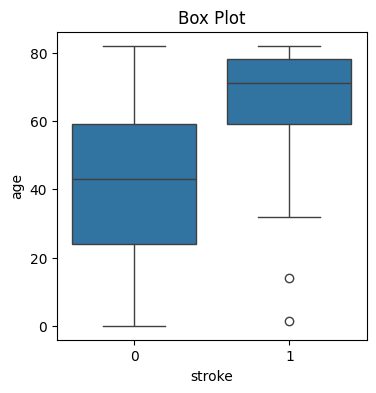

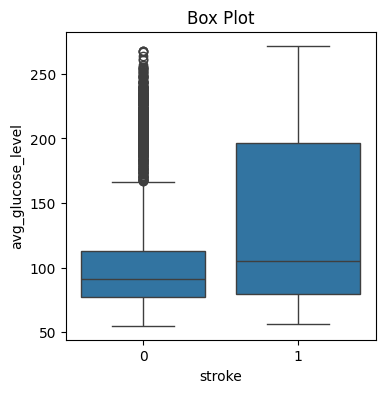

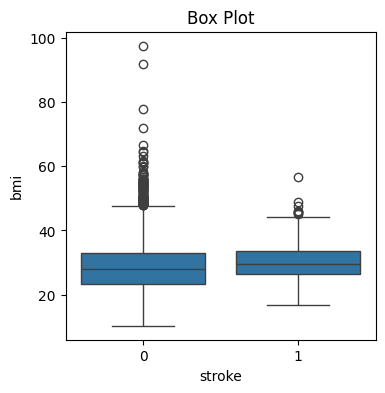

In [26]:
# Box plots for numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    plt.figure(figsize=(4,4))
    sns.boxplot(x='stroke', y=feature, data=df)
    plt.title(f'Box Plot')
    plt.show()

1.Age: The boxplot shows the median age and interquartile range. There may be some outliers among older individuals, indicating extreme values.

2.Glucose Levels: A right-skewed distribution with some high-value outliers, which could indicate diabetes-related conditions.

3.BMI (Body Mass Index): Some individuals have significantly higher BMI values, suggesting possible obesity-related health risks.

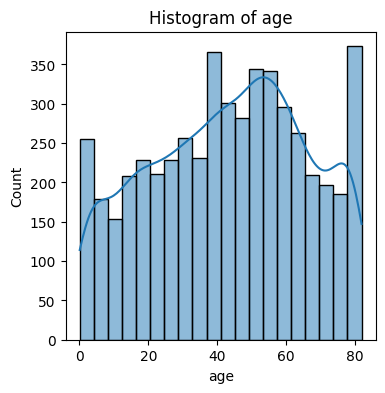

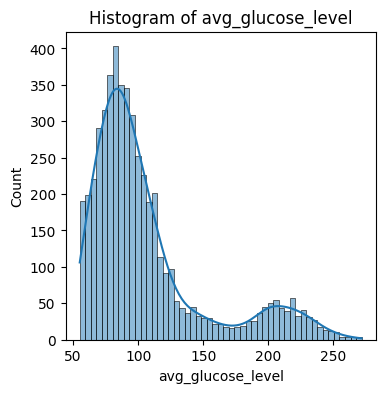

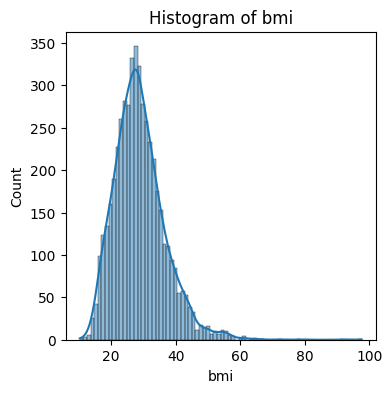

In [27]:
# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(4,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

1.Age Distribution: The dataset contains a diverse age range, with a concentration of middle-aged and older individuals. Stroke risk tends to increase with age.

2.Glucose Levels: A right-skewed distribution indicates that while most individuals have normal glucose levels, a subset has significantly high values, which could be linked to stroke risk.

3.BMI (Body Mass Index): The BMI values appear to follow a normal distribution, with a peak around the overweight category.

## **Data processing**

In [28]:
# Handling missing values
df = df.dropna()  # Drop missing values for simplicity

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define independent (X) and dependent (y) variables
X = df.drop(columns=["stroke"])  # Features
y = df["stroke"]  # Target variable

## **Split data and train the model**

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(class_weight="balanced", random_state=42)  # Adjusting for class imbalance
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

##**Evaluate the model**

Model Accuracy: 75.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       940
           1       0.11      0.67      0.19        42

    accuracy                           0.75       982
   macro avg       0.54      0.71      0.52       982
weighted avg       0.94      0.75      0.83       982



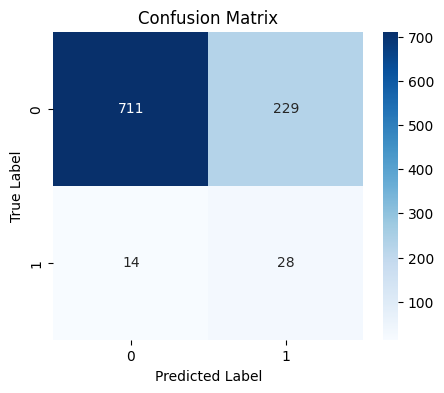

In [30]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### **Interpretation of Logistic Regression Results**

- **Accuracy (75.66%)**: The model correctly classifies 75.66% of cases, but due to class imbalance, this may not reflect true performance.  

#### **Class 0 (Non-Stroke) Performance:**
- **Precision (98%)**: When predicting non-stroke, the model is correct 98% of the time.  
- **Recall (76%)**: The model correctly identifies 76% of actual non-stroke cases, misclassifying some as strokes.  
- **F1-score (86%)**: A good balance of precision and recall for non-stroke scenarios.
